In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

In [ ]:
#This is the project I did: https://medium.com/gitconnected/data-science-trends-salaries-in-2023-57b75df39d32

In [5]:
pip install jupyterthemes


Note: you may need to restart the kernel to use updated packages.


In [15]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [21]:
set_nb_theme('onedork')

In [56]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [58]:
#To check for missing data, use isnull
df.isnull().sum().sum()

0

In [59]:
#Now going to look at number of unique values in the columns
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [30]:
#Taking a look at the years column. Counts up how many of each year
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22')]

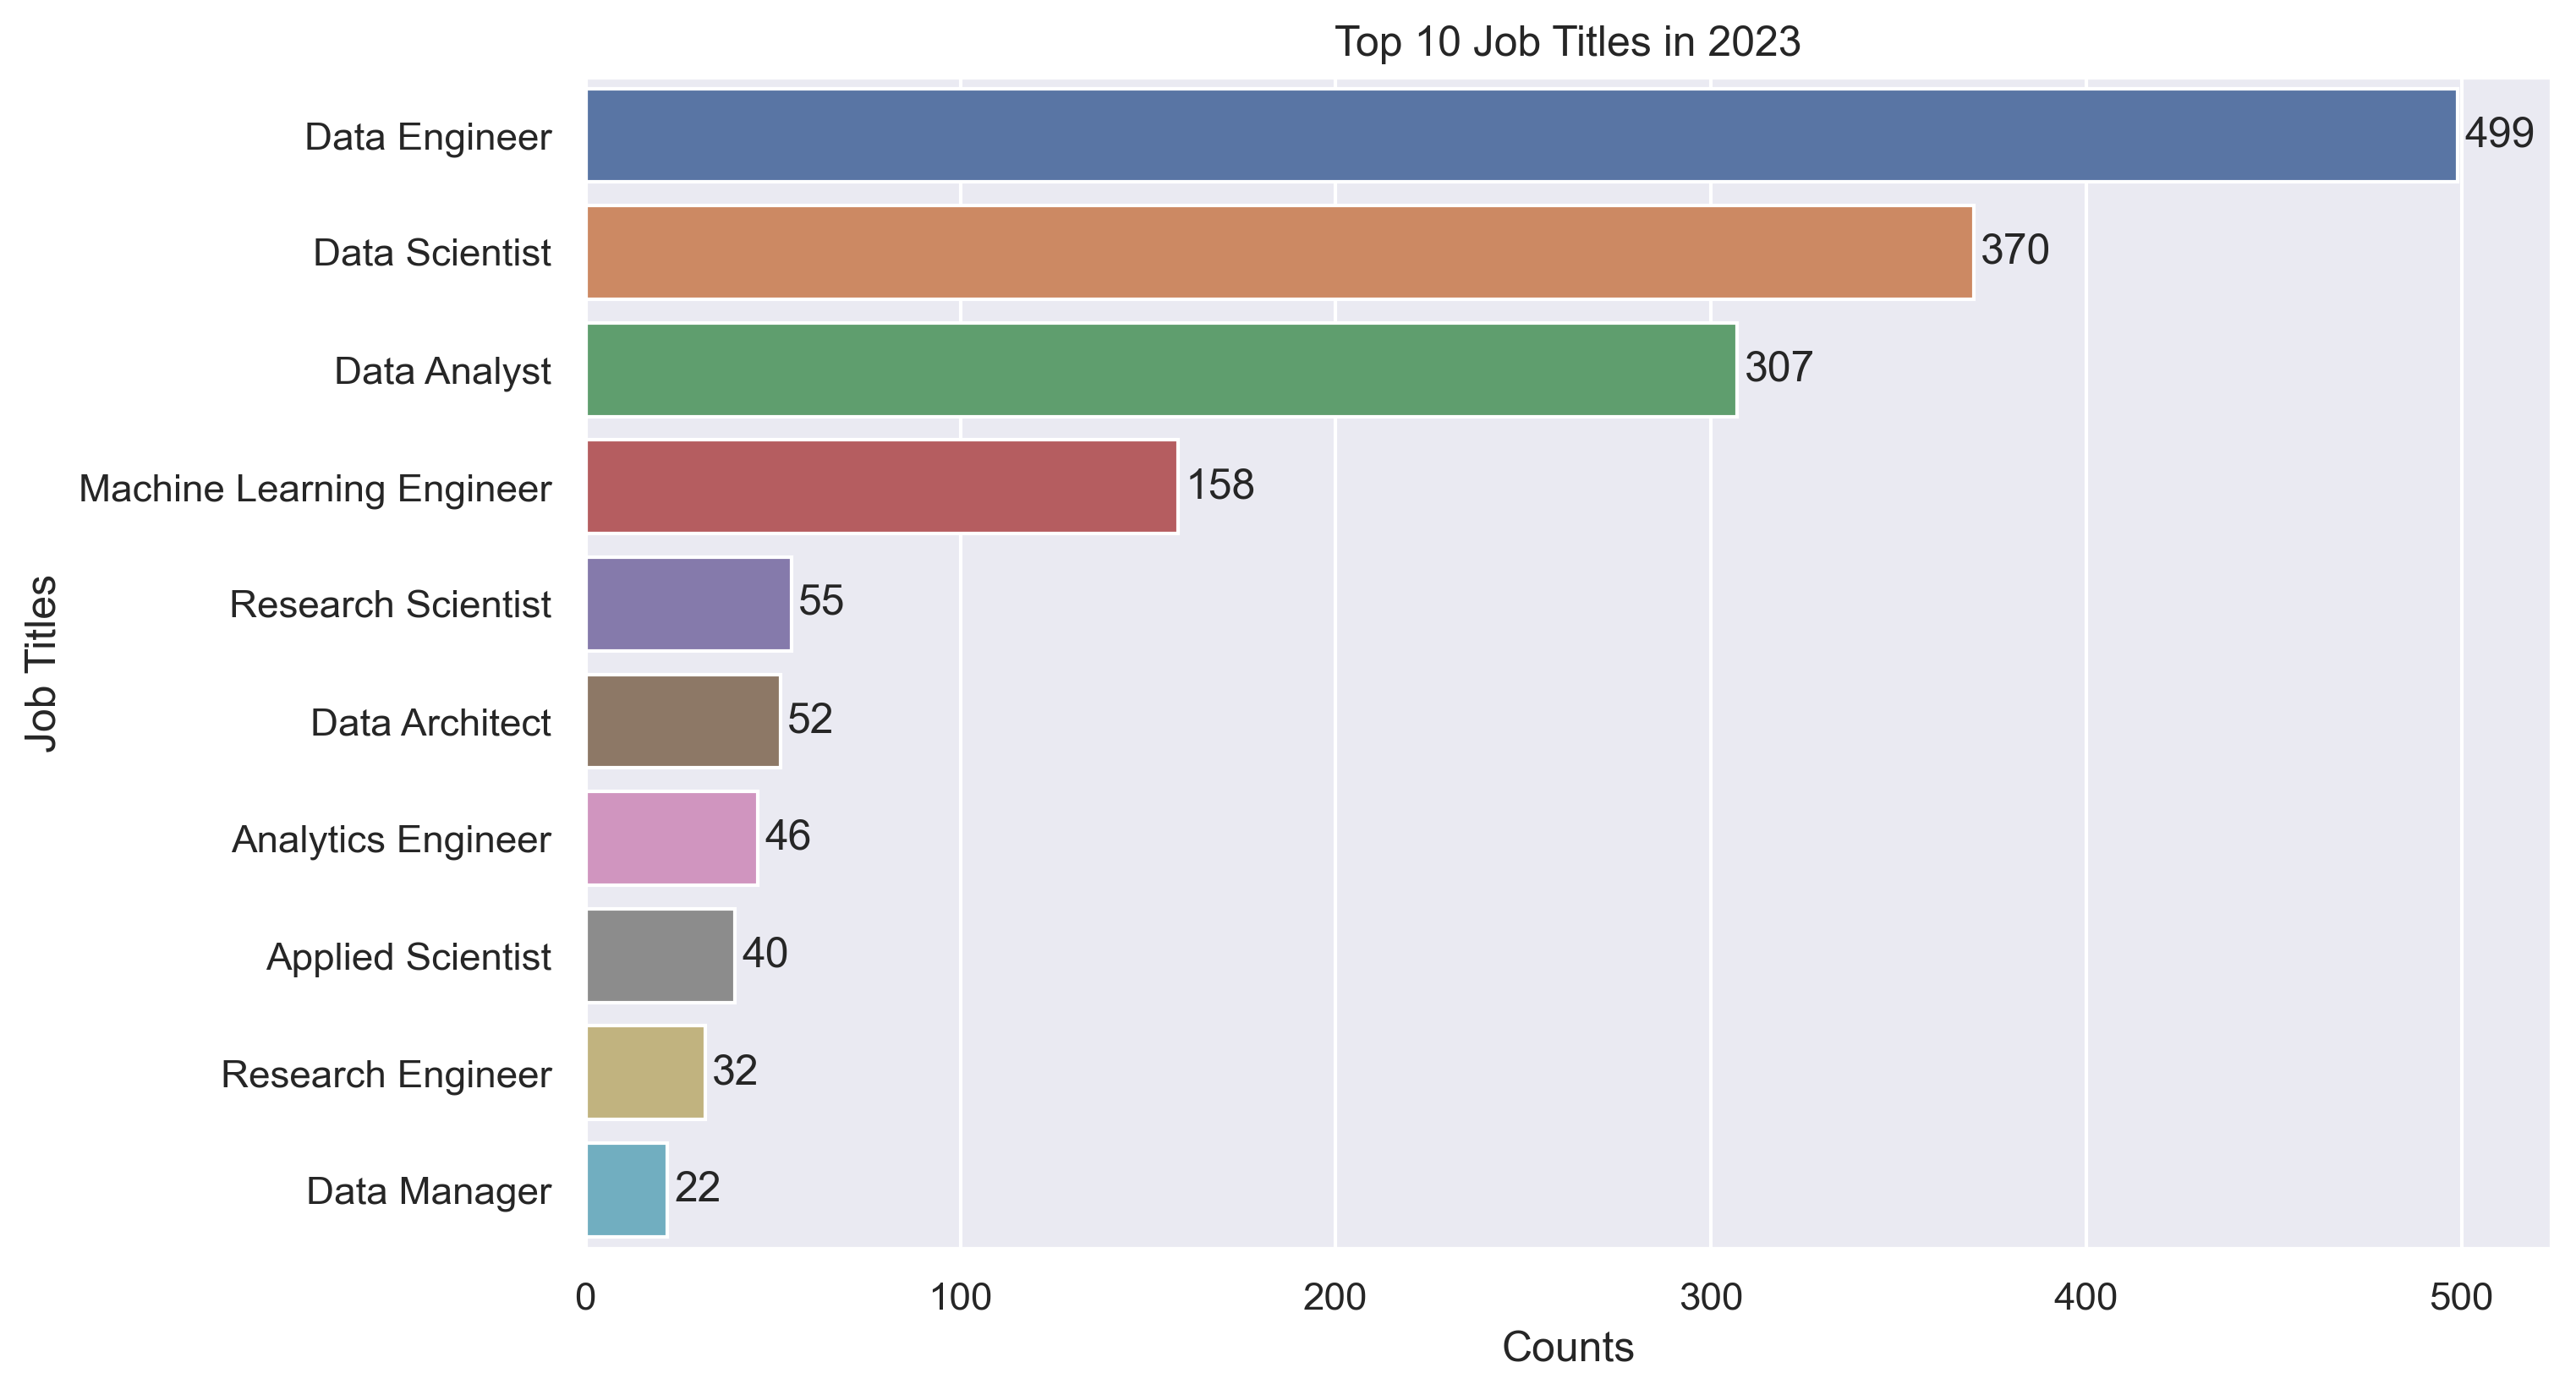

In [60]:
##Now, going to explore the top 10 job titles in 2023
#Must firt select our target year and only plot the top 10
jobs = df[df['work_year'] == 2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = jobs, y = jobs['index'], x = jobs.job_title)
ax.set(ylabel = 'Job Titles', xlabel = 'Counts', title = 'Top 10 Job Titles in 2023')
ax.bar_label(ax.containers[0], padding = 2)


In [61]:
#Now we will look at experience levels
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [62]:
#Now we can change each name to their full names
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive')

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

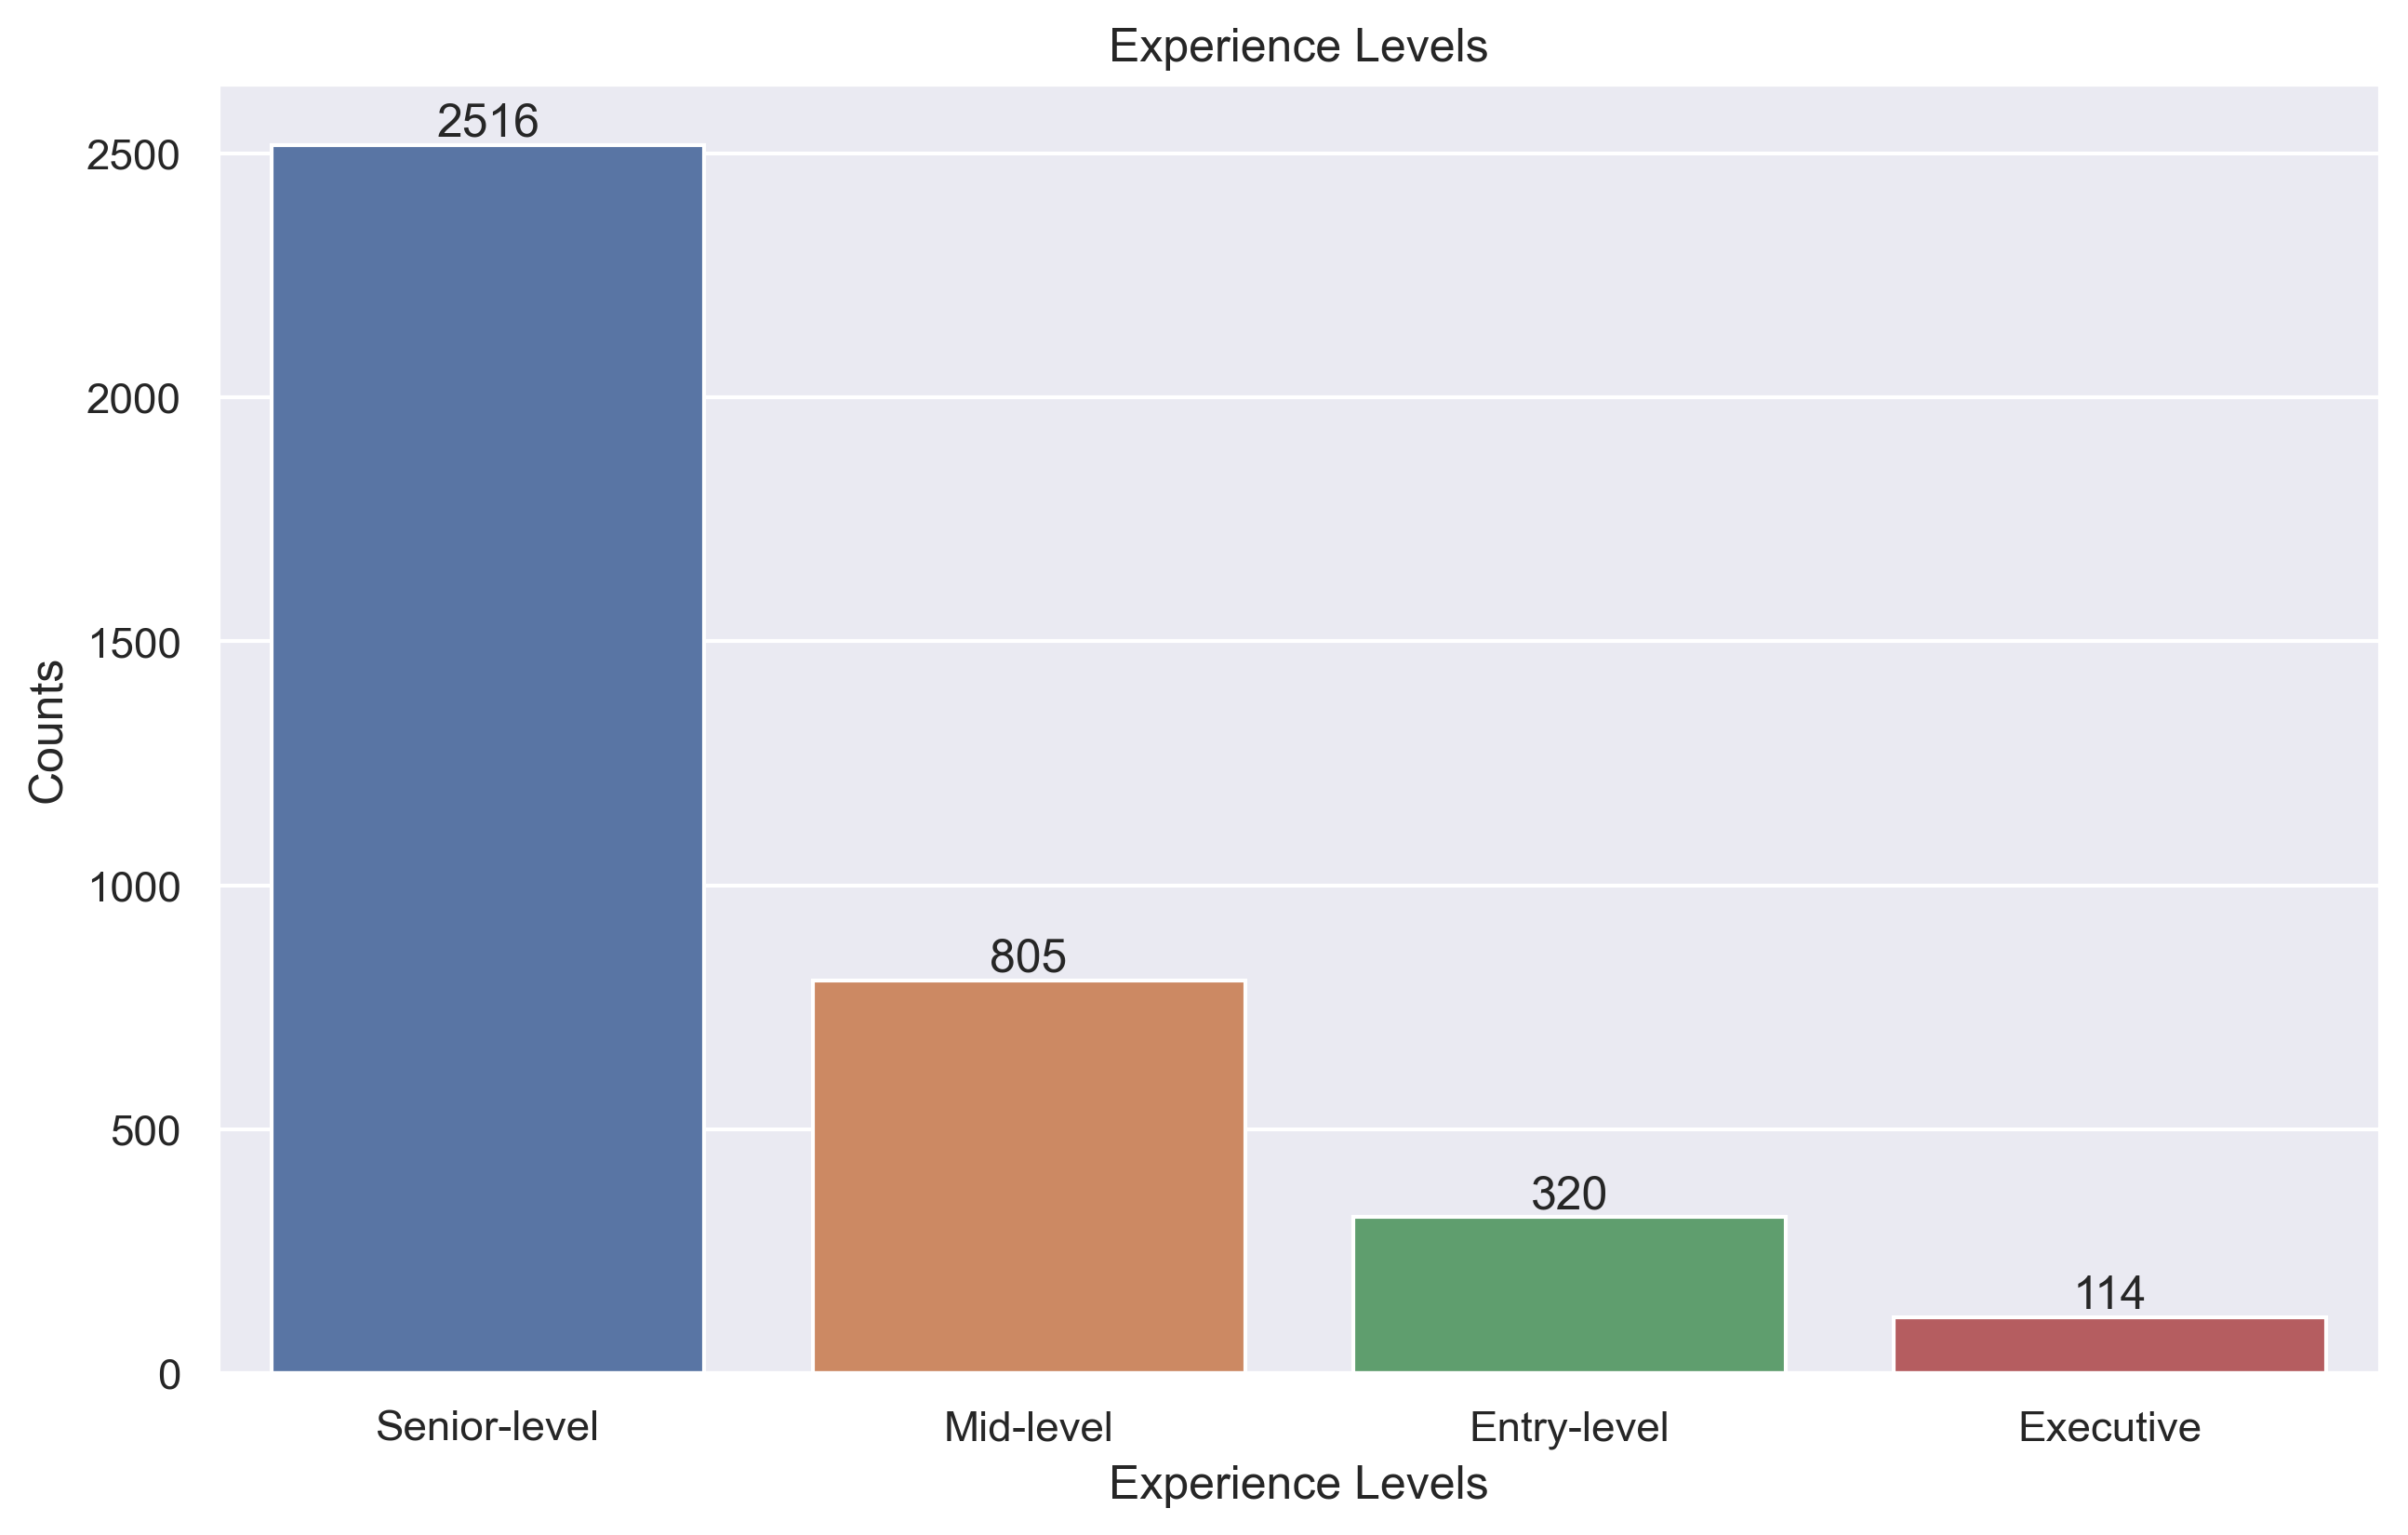

In [63]:
#Now lets visualize the experience level of employees
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.experience_level)
ax.set(xlabel = 'Experience Levels', ylabel = 'Counts', title = 'Experience Levels')
ax.bar_label(ax.containers[0])

In [64]:
#Now we will look at employment types
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [80]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')
#Creating a dataframe for the top 10 jobs and their employment types
jobs2 = df[df['work_year'] == 2023]['job_title'].value_counts().nlargest(5).reset_index()

top_jobs_df2 = df[df['job_title'].isin(jobs2['index'])]


[Text(0, 0, '836'), Text(0, 0, '3'), Text(0, 0, '1'), Text(0, 0, '0')]

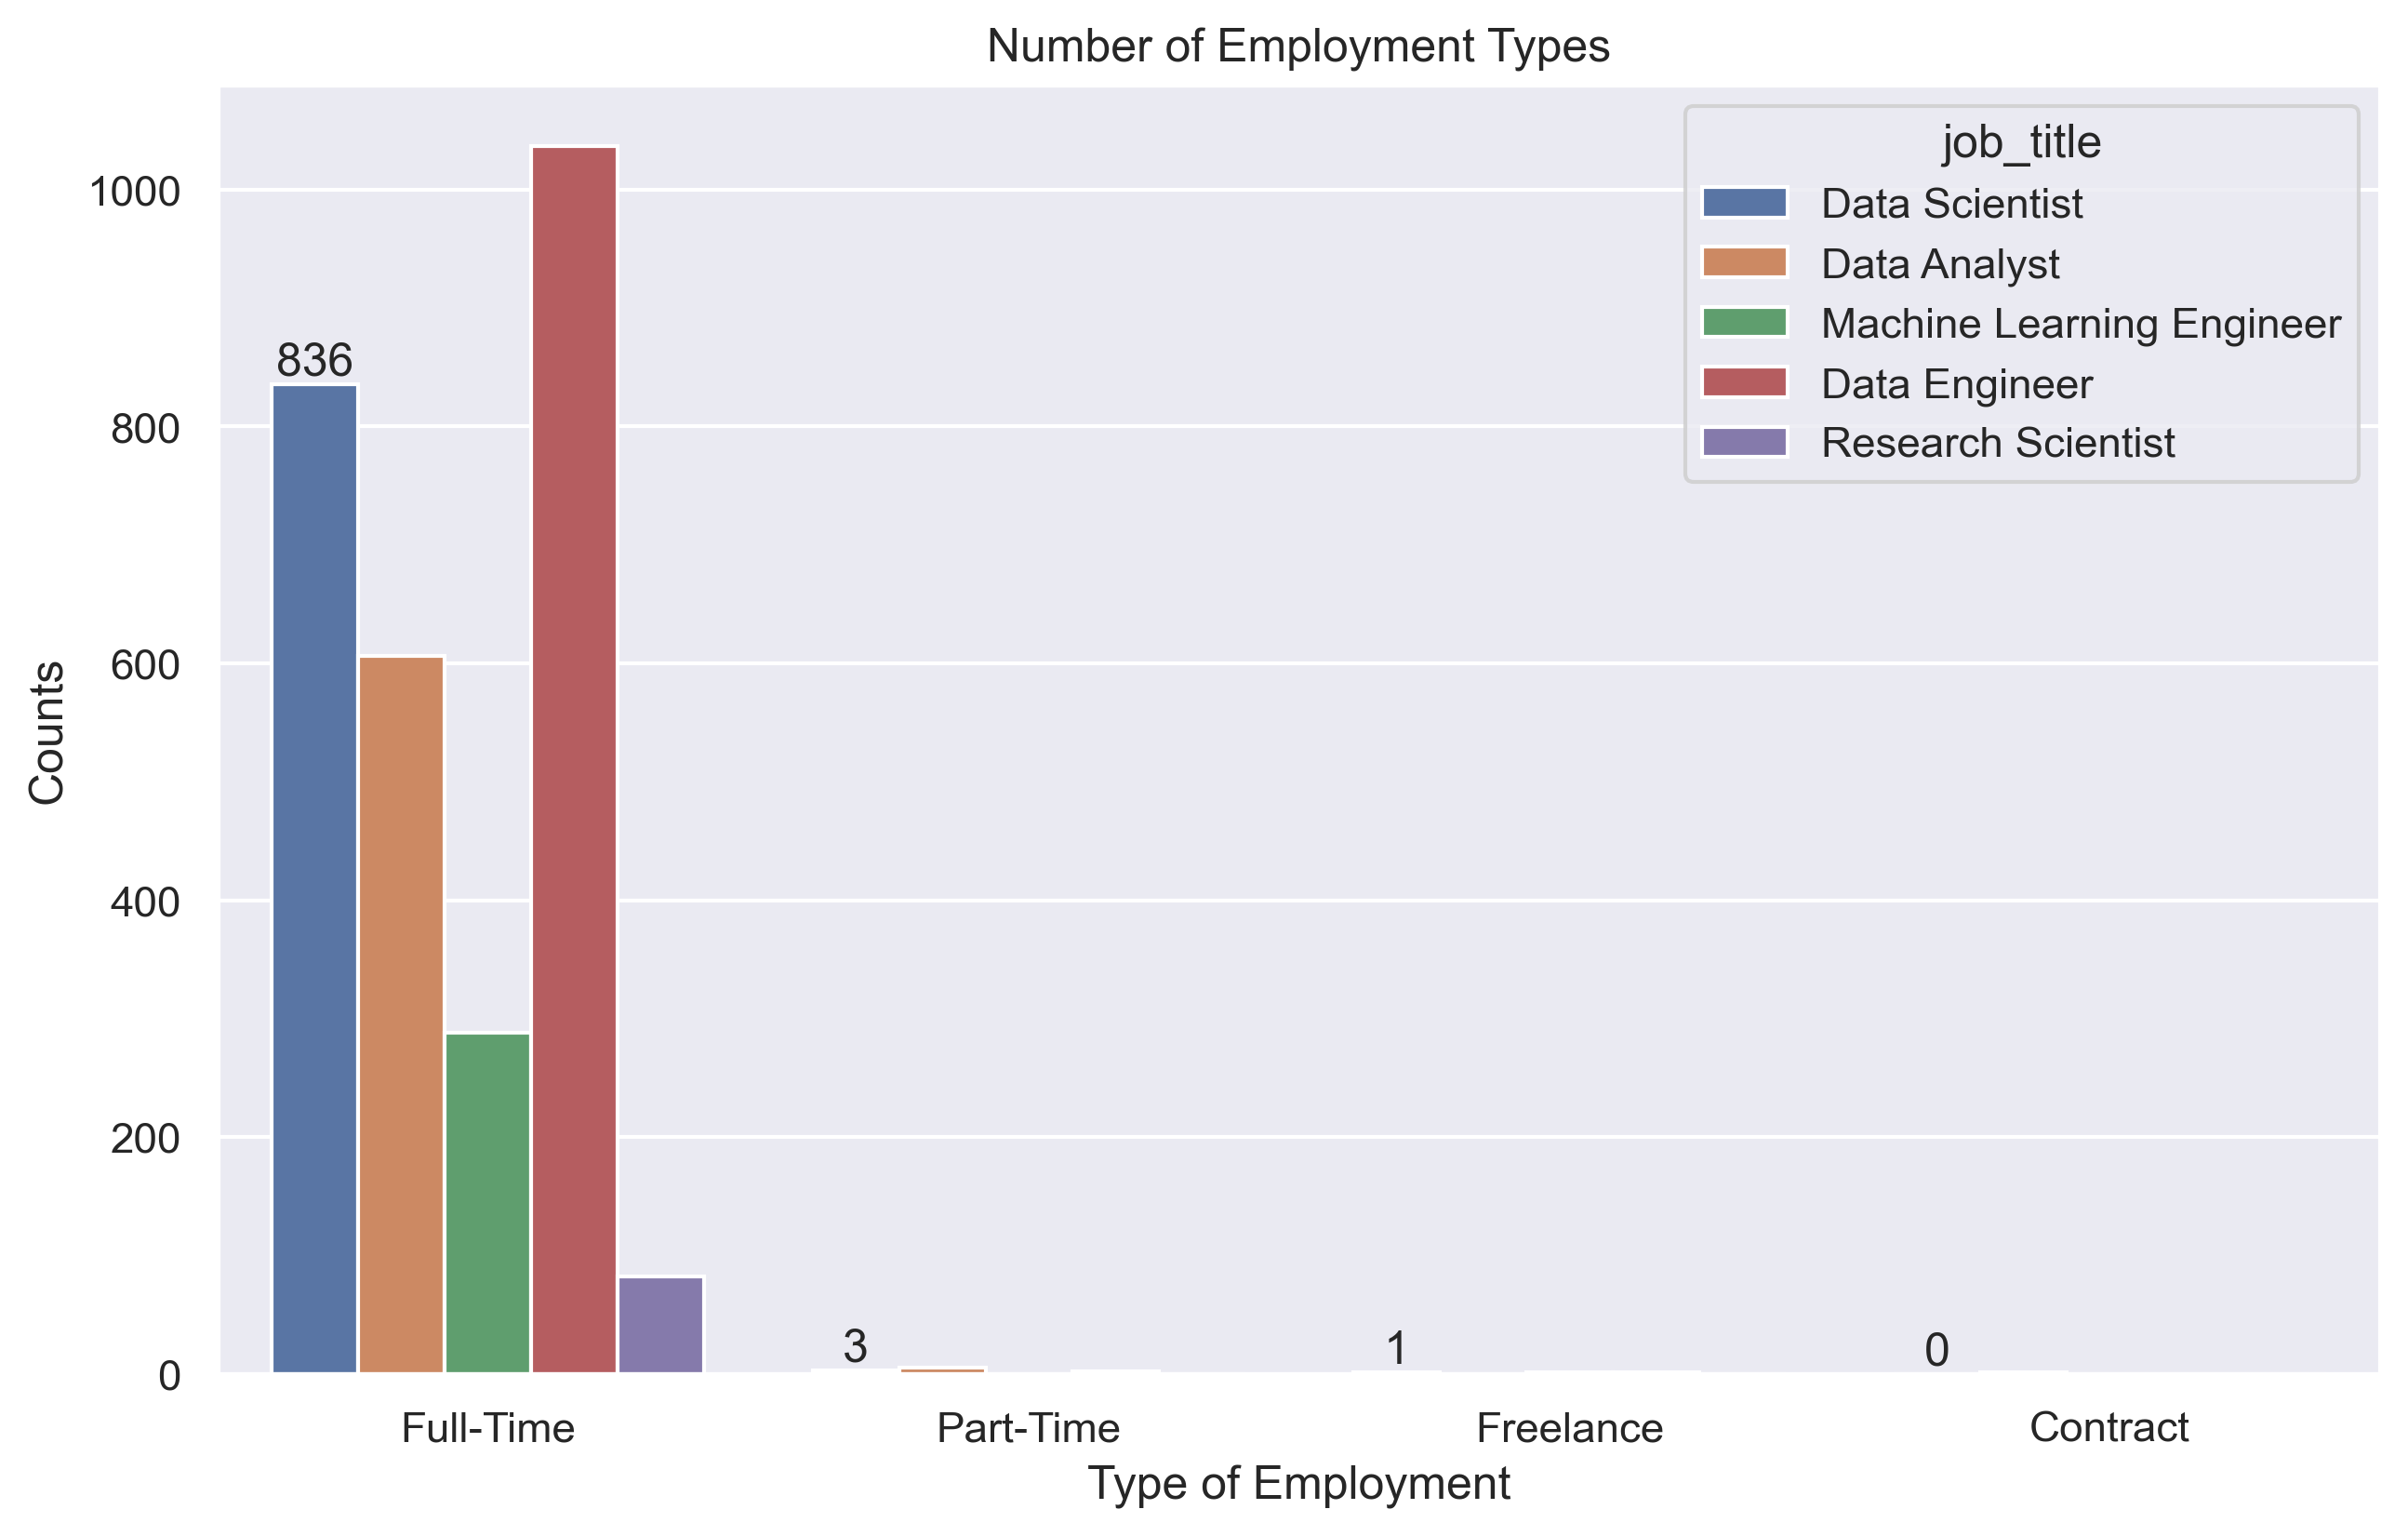

In [81]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = top_jobs_df, x='employment_type', hue= 'job_title')
ax.set(xlabel = 'Type of Employment', ylabel = 'Counts', title = 'Number of Employment Types')
ax.bar_label(ax.containers[0])

[Text(2, 0, '375000'),
 Text(2, 0, '250000'),
 Text(2, 0, '212500'),
 Text(2, 0, '211254'),
 Text(2, 0, '198171'),
 Text(2, 0, '195141'),
 Text(2, 0, '192500'),
 Text(2, 0, '192420'),
 Text(2, 0, '191279'),
 Text(2, 0, '190264'),
 Text(2, 0, '190000'),
 Text(2, 0, '183858'),
 Text(2, 0, '175052'),
 Text(2, 0, '174150'),
 Text(2, 0, '163220')]

<Figure size 7500x2700 with 0 Axes>

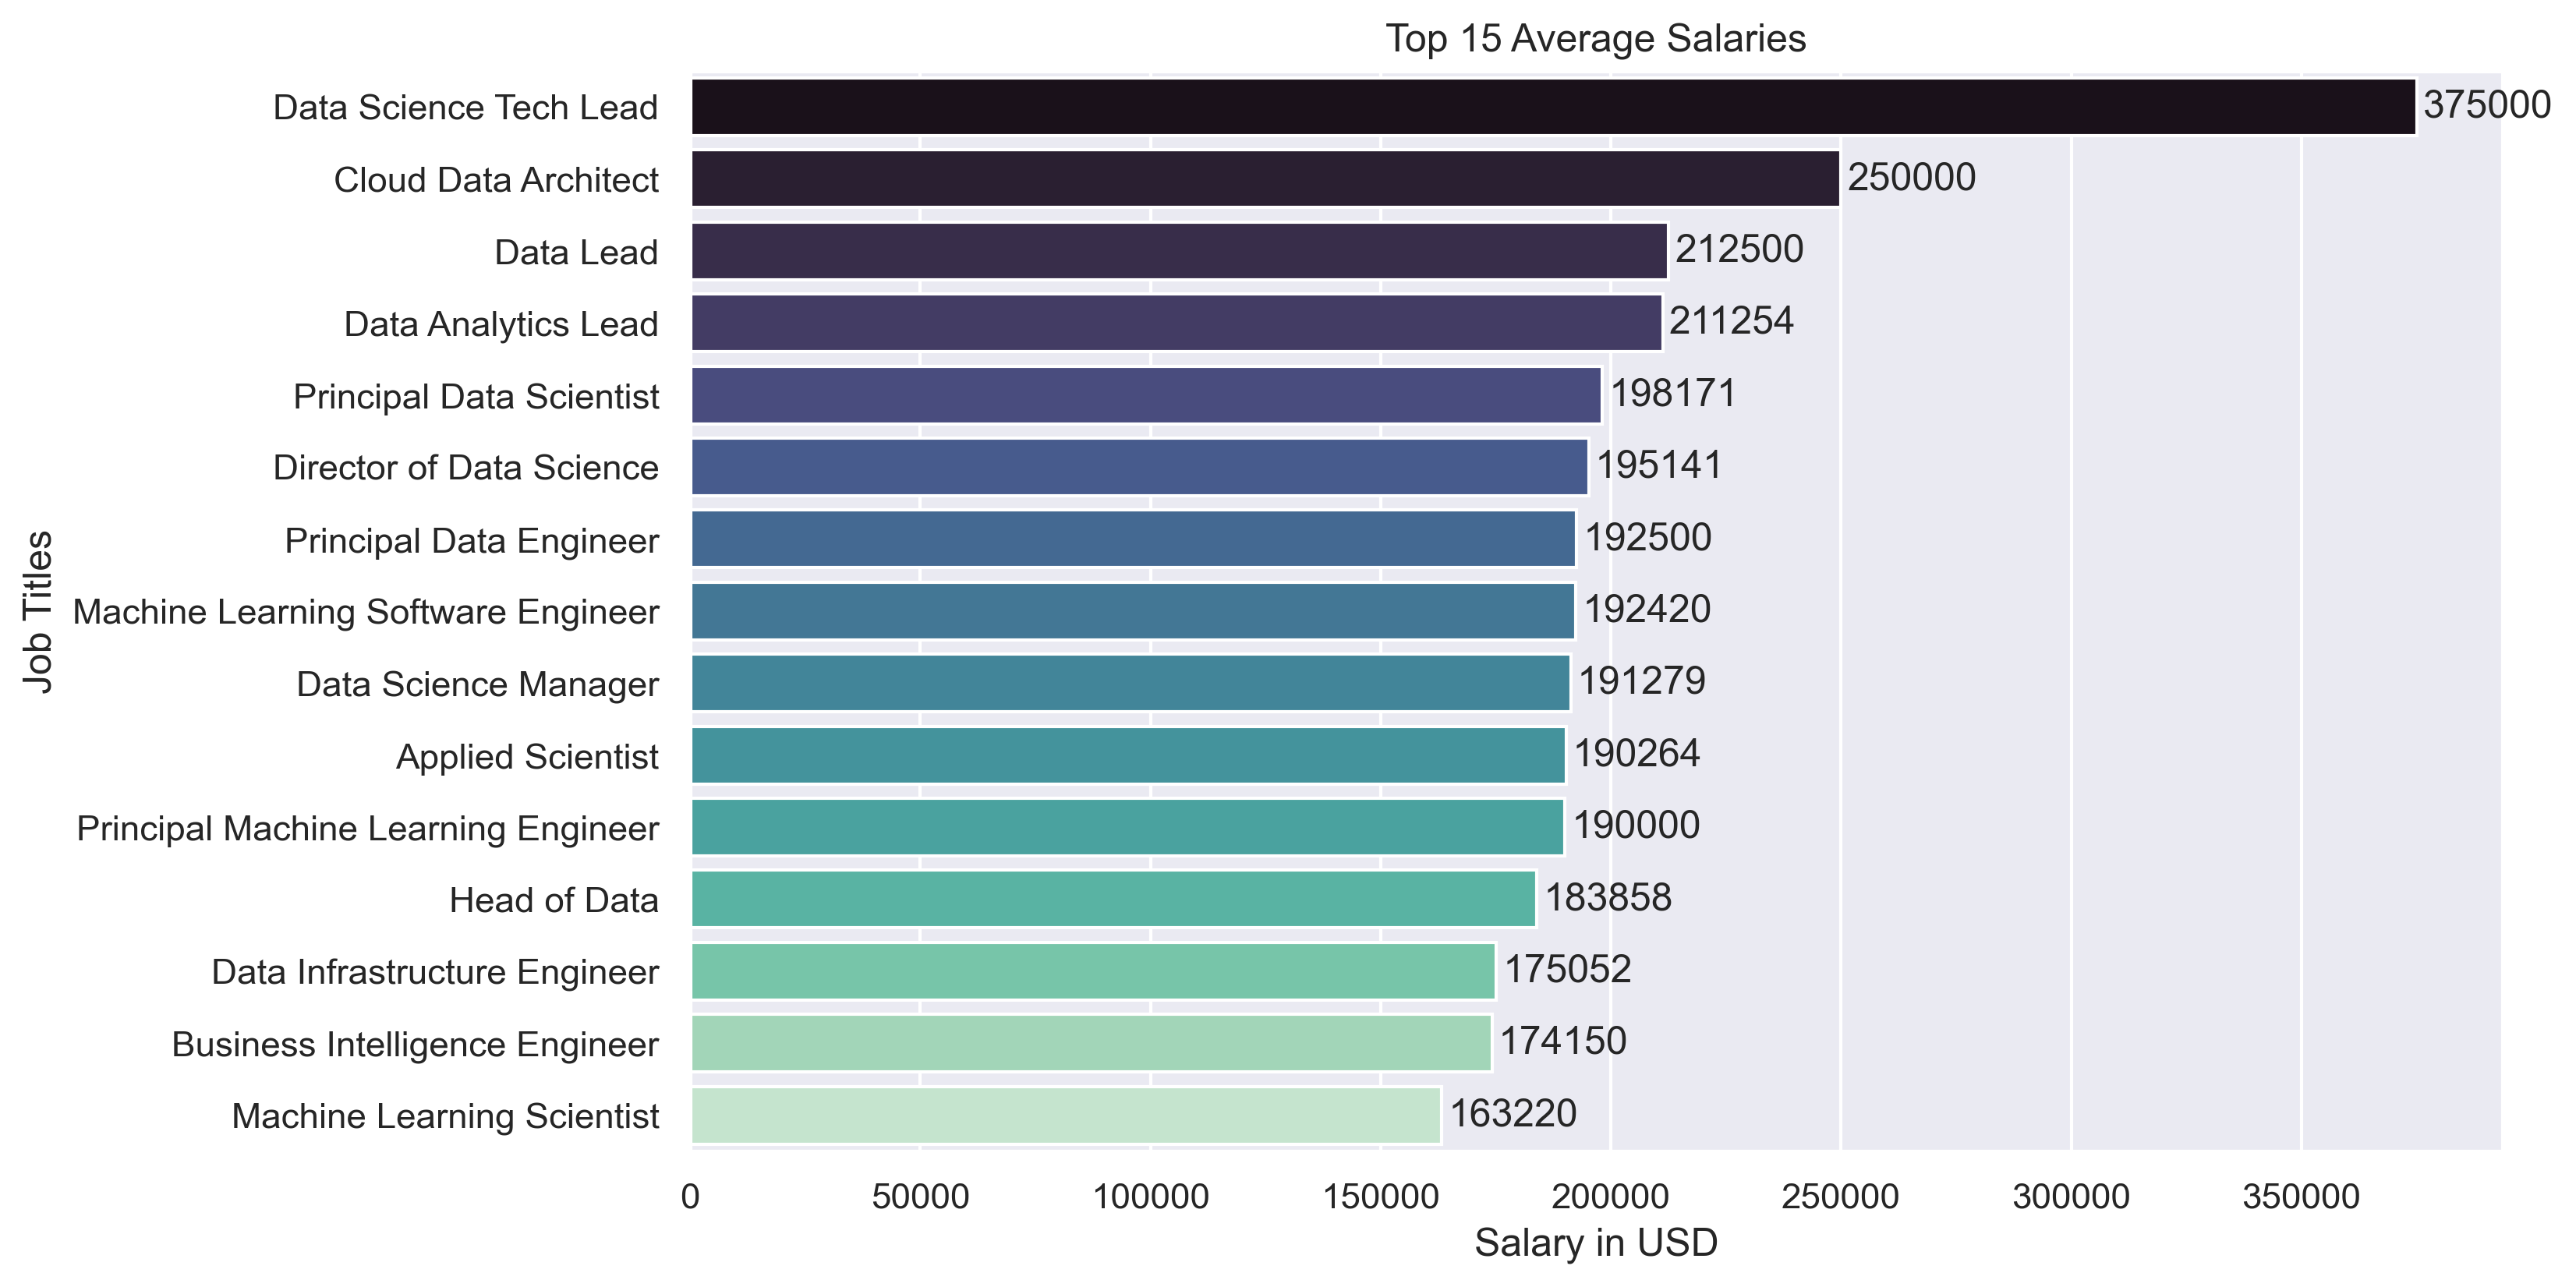

In [87]:
#Salaries by Job Titles
#Filter and group
job_title_salary = df['salary_in_usd'].groupby(df['job_title']).mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
plt.figure(figsize = (25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = job_title_salary, y = job_title_salary.job_title, x = job_title_salary.salary_in_usd, palette = 'mako')
ax.set(ylabel = 'Job Titles', xlabel = 'Salary in USD', title = 'Top 15 Average Salaries')
ax.bar_label(ax.containers[0], padding = 2)


[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

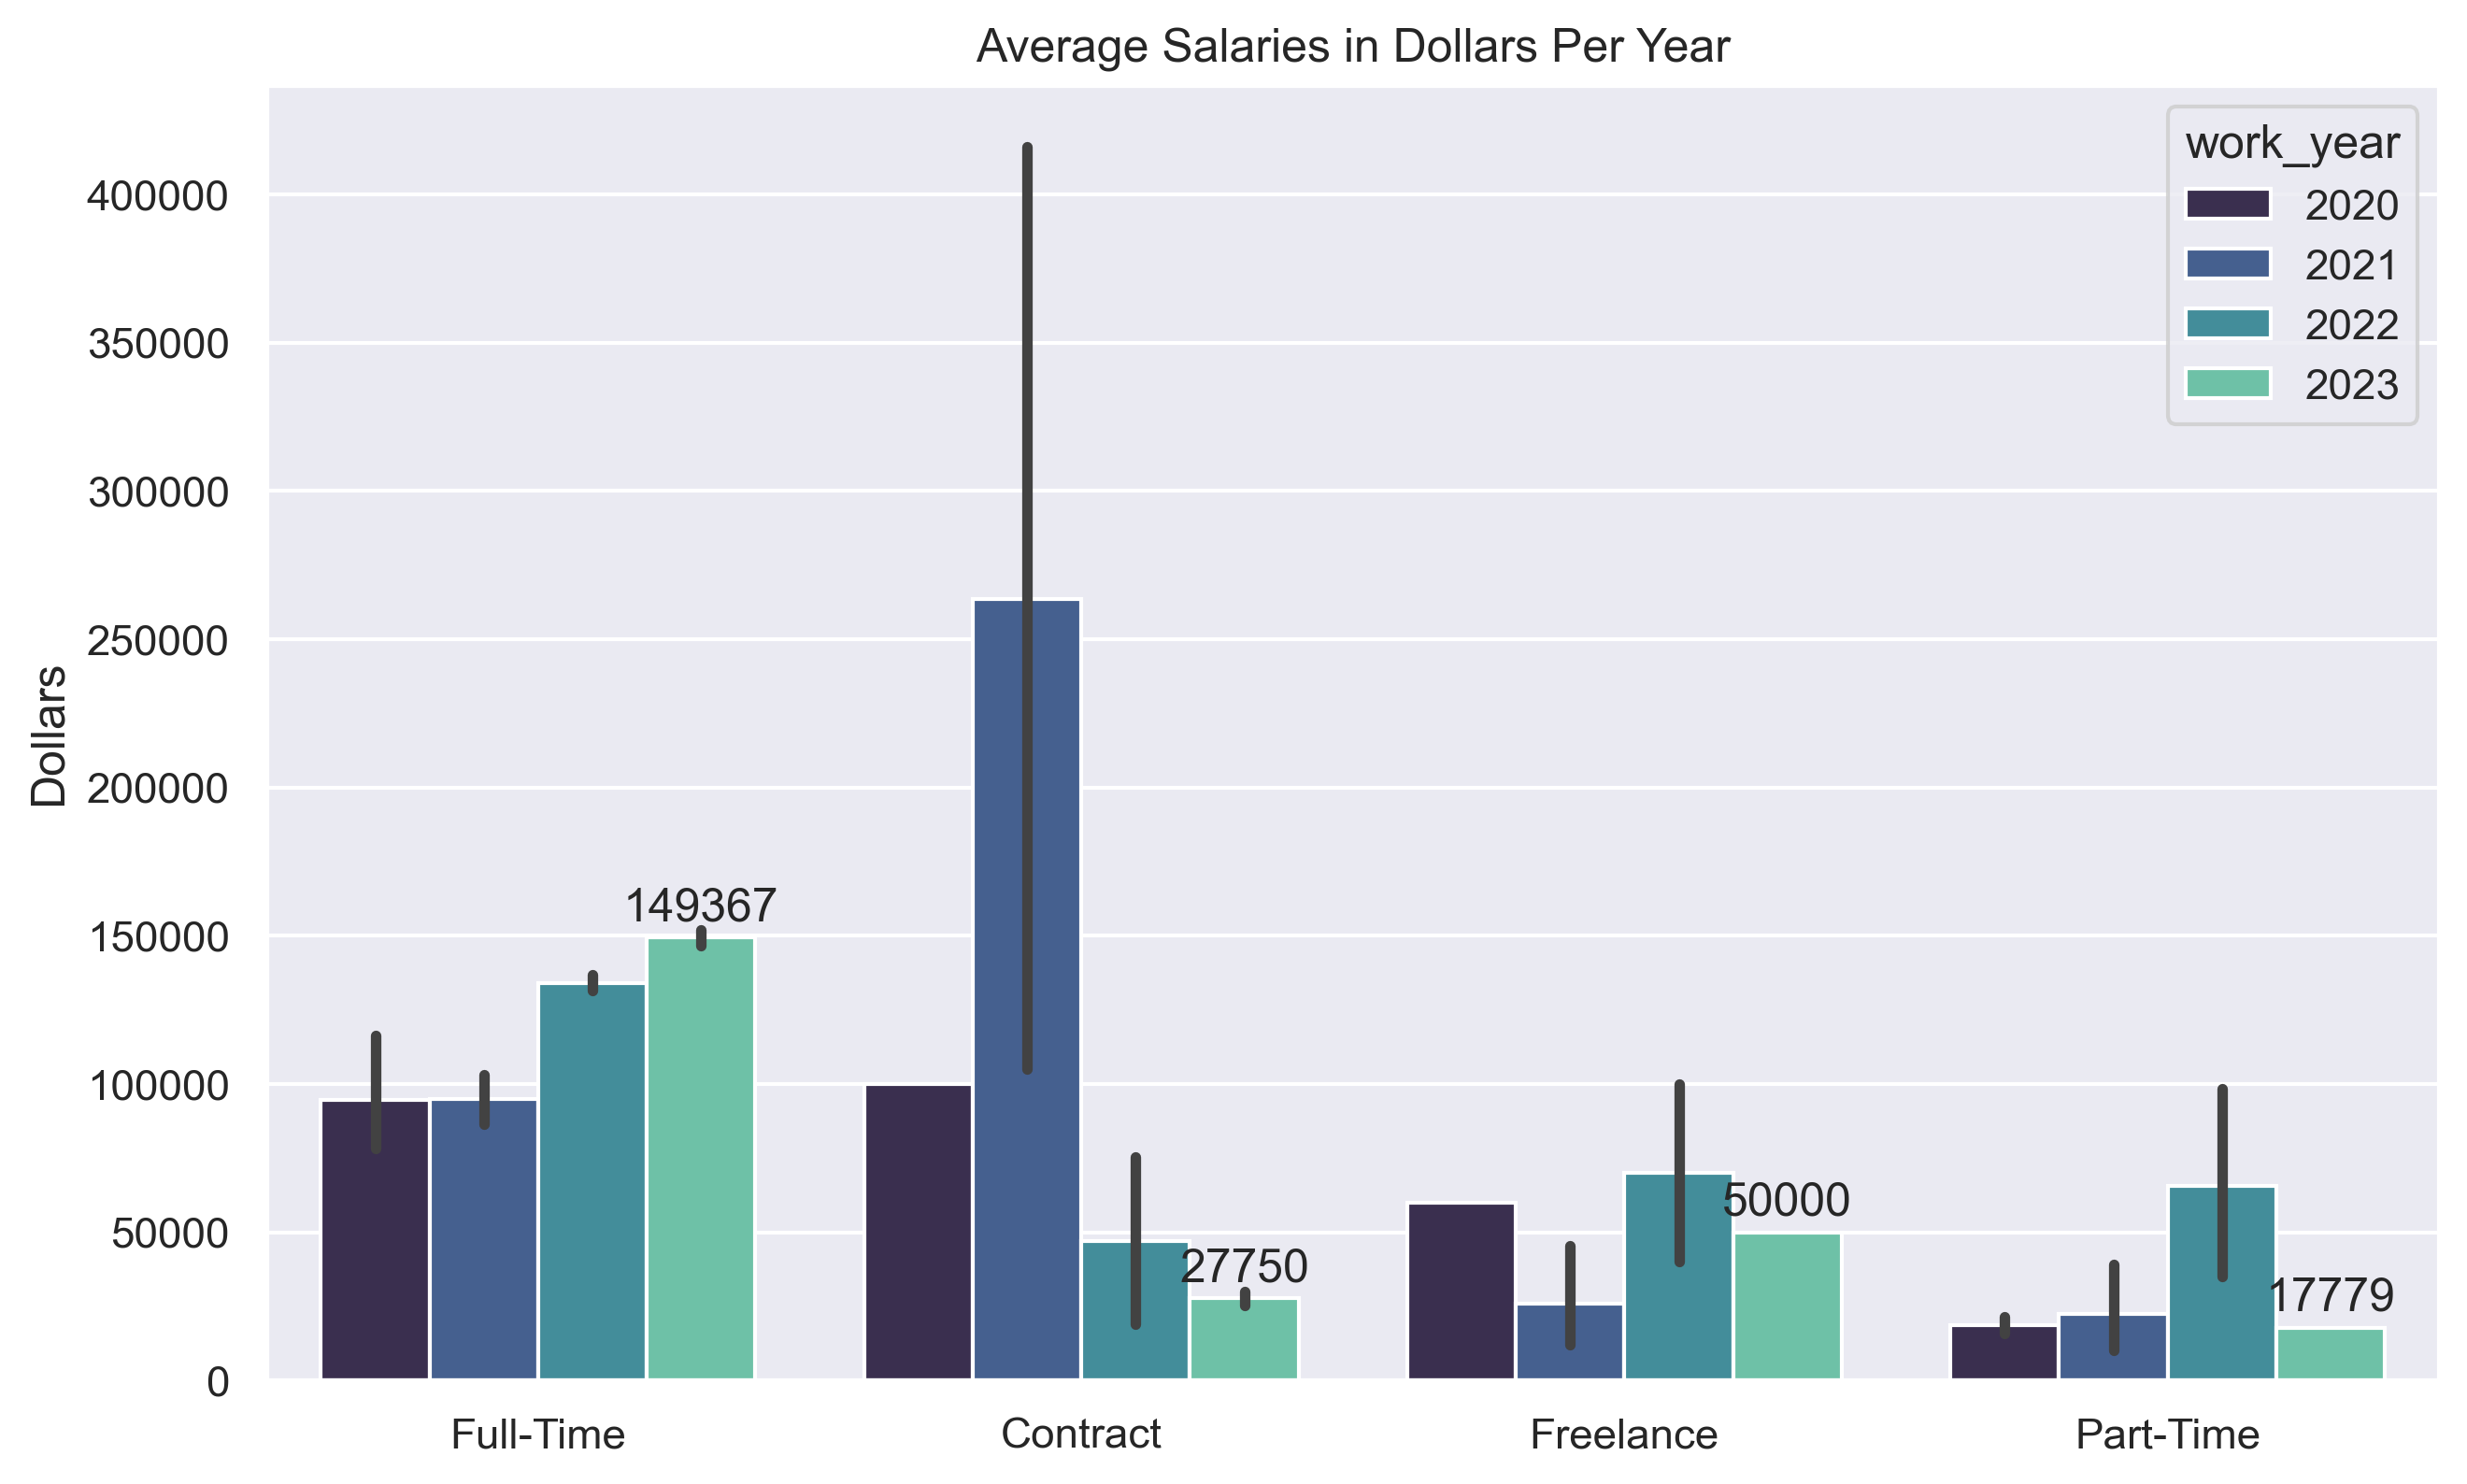

In [91]:
#Salaries by employment type
#Need to group again the employment types and salaries
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax = ax, data = df, x = 'employment_type', y = 'salary_in_usd', hue = 'work_year', palette = 'mako')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)


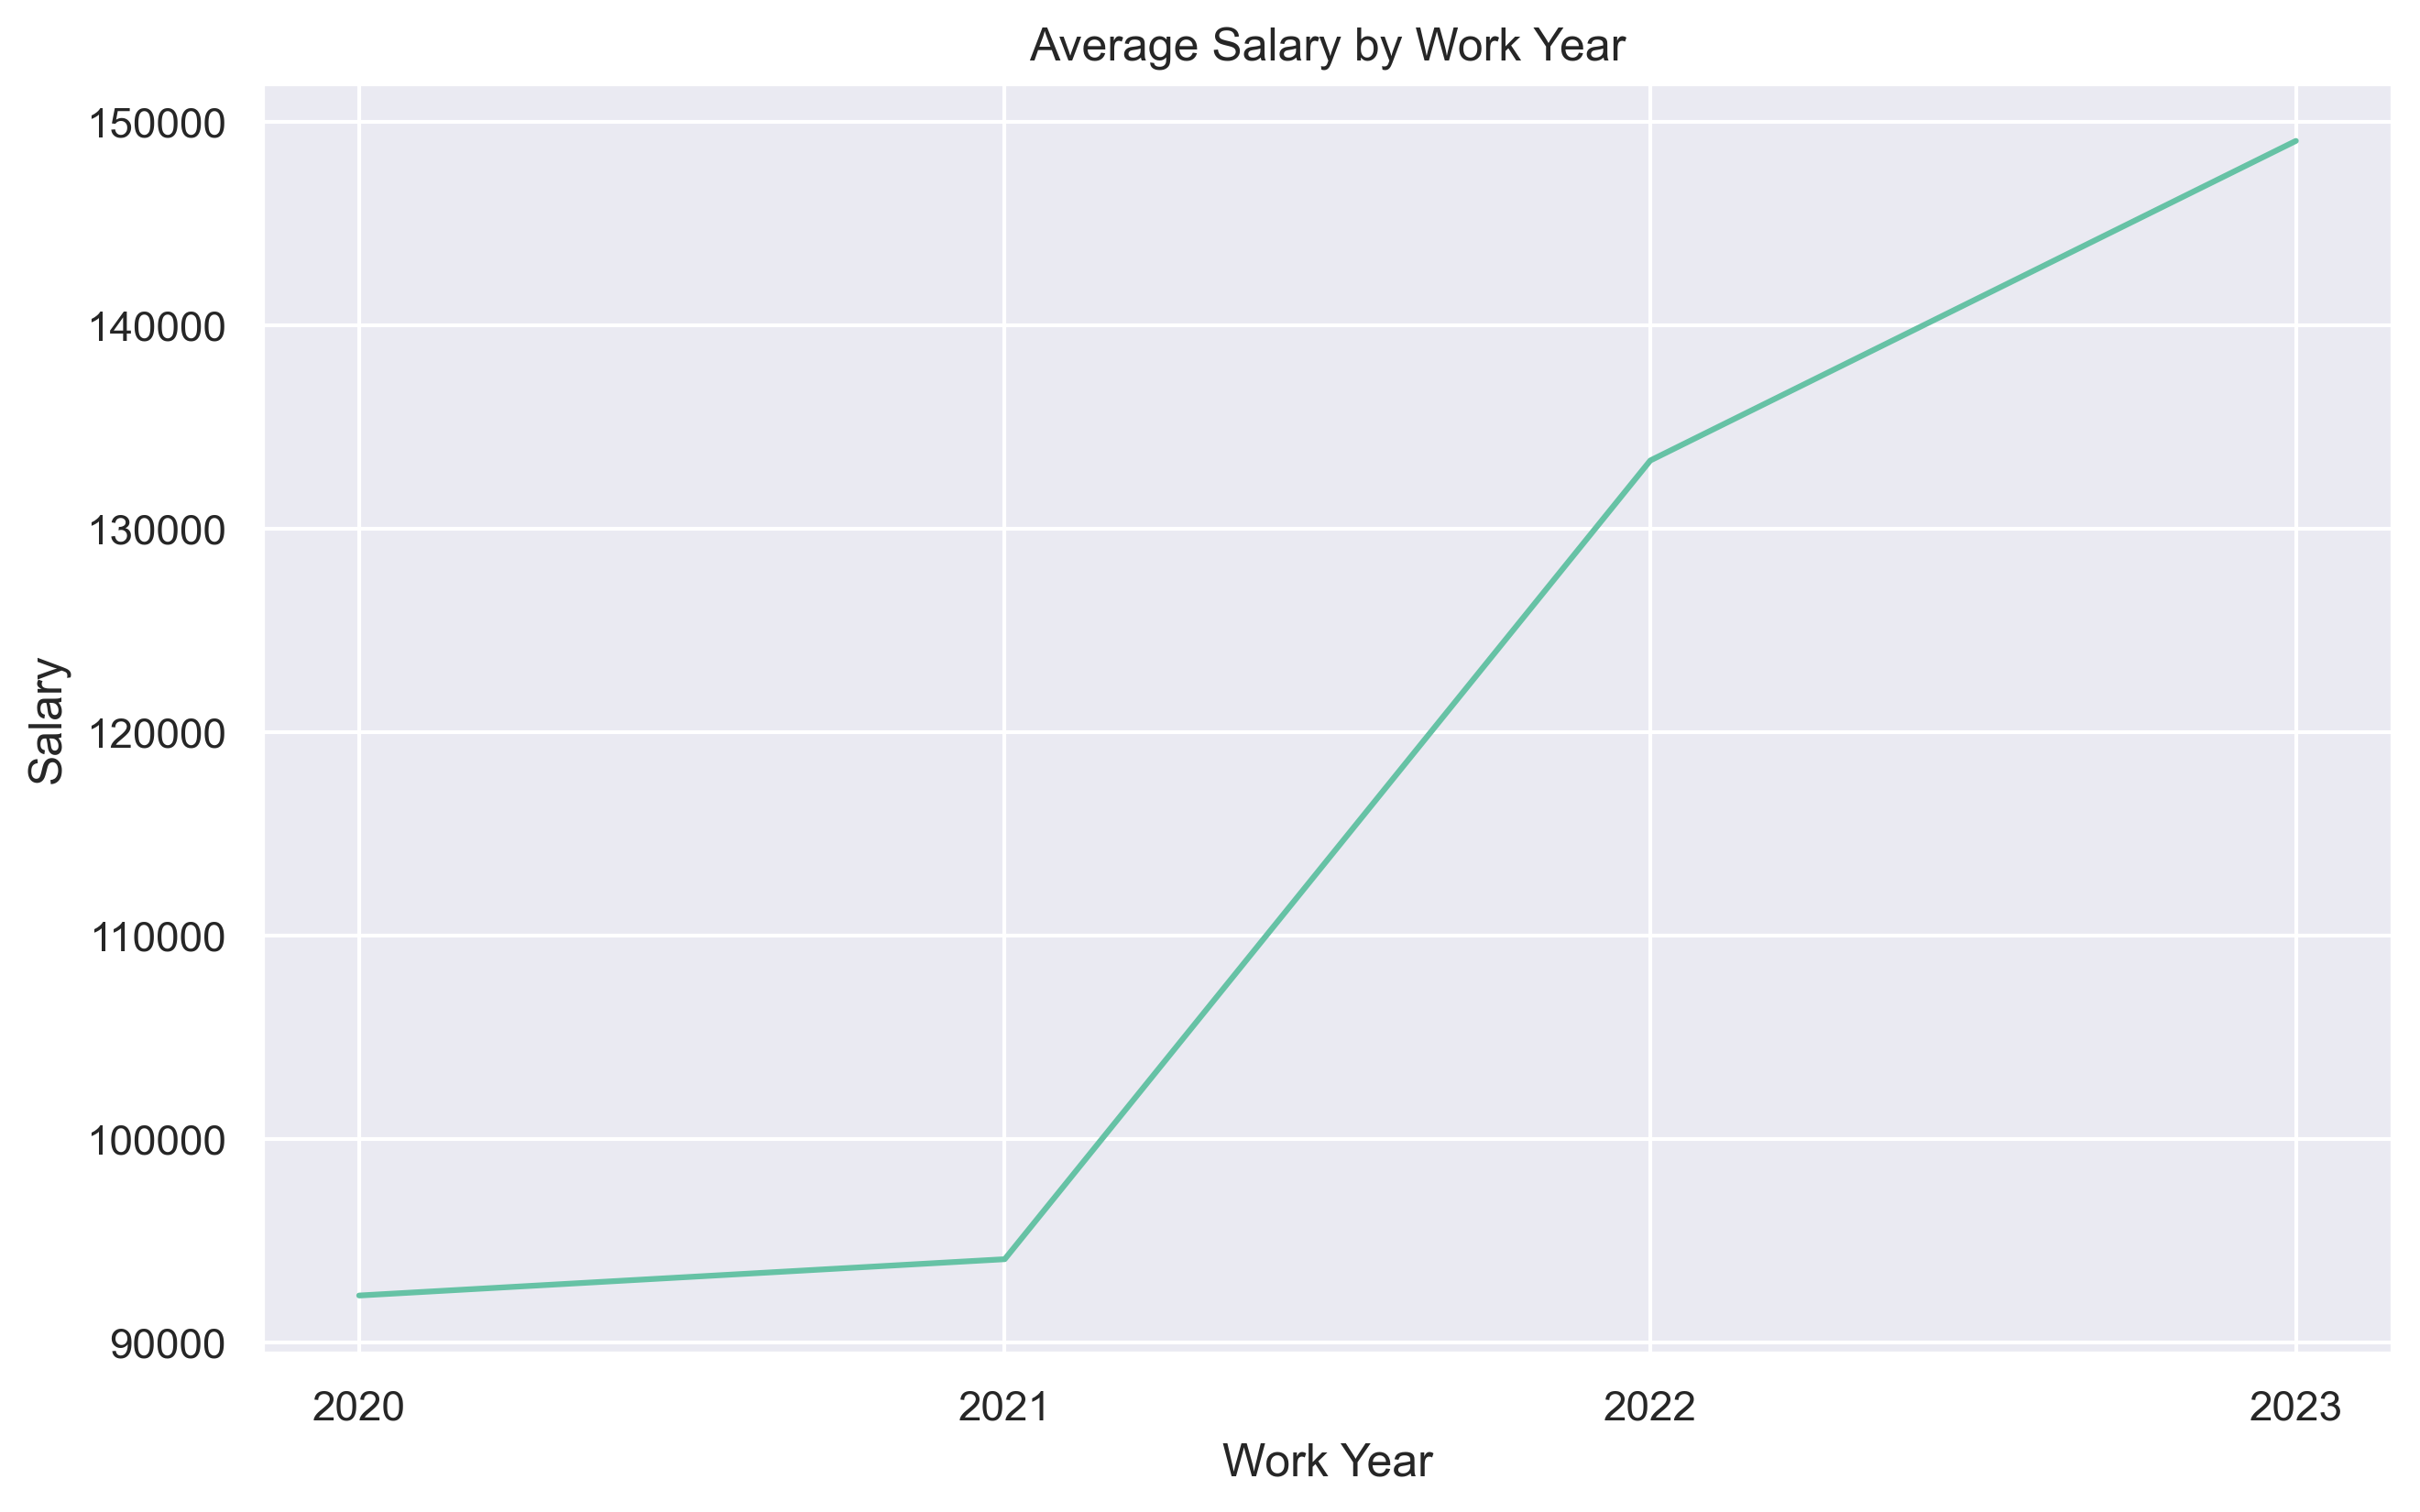

In [94]:
#Salaries by work years
#Filter using the groupby function
year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salary by Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022', '2023'], y = year_based_salary)
plt.show()